In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/04+-+decisiontreeAdultIncome.csv')
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19787 non-null  int64 
 1   wc              19787 non-null  object
 2   education       19787 non-null  object
 3   marital status  19787 non-null  object
 4   race            19787 non-null  object
 5   gender          19787 non-null  object
 6   hours per week  19787 non-null  int64 
 7   IncomeClass     19787 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [6]:
data.shape

(19787, 8)

In [9]:
#check for missing values
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

In [11]:
#Check the data type
data.dtypes

age                int64
wc                object
education         object
marital status    object
race              object
gender            object
hours per week     int64
IncomeClass       object
dtype: object

In [12]:
#create dummies variables
data_prep = pd.get_dummies(data,drop_first=True)
data_prep.head()

,age,hours per week,wc_ Local-gov,wc_ Never-worked,wc_ Private,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,IncomeClass_ >50K
0,38,40,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
1,28,40,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
2,37,40,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
3,31,50,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True
4,42,40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True


In [14]:
#Create X & Y
X= data_prep.iloc[:,:-1]
X.head()

,age,hours per week,wc_ Local-gov,wc_ Never-worked,wc_ Private,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male
0,38,40,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True
1,28,40,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False
2,37,40,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False
3,31,50,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,42,40,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True


In [15]:
y = data_prep.iloc[:,-1]
y.head()

0    False
1    False
2    False
3     True
4     True
Name: IncomeClass_ >50K, dtype: bool

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234,stratify=y)
print(f"X_train:{len(X_train)} X_test:{len(X_test)}")

X_train:13257 X_test:6530


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Train the model
dtc = DecisionTreeClassifier(random_state=1234)

In [20]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [22]:
y_predict = dtc.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_test,y_predict)
cm 

array([[4211,  599],
       [ 884,  836]], dtype=int64)

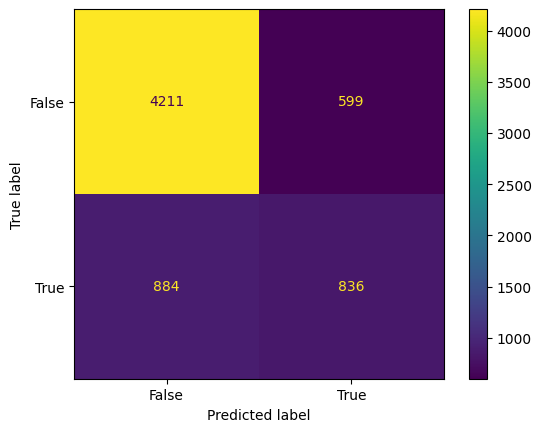

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()